# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | saudarkrokur
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | yuzhno-kurilsk
Processing Record 9 of Set 1 | ermoupolis
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | phan rang-thap cham
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | weno
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | ximeicun
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | chornomors'k
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | port

Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | enewetak
Processing Record 45 of Set 4 | vanimo
Processing Record 46 of Set 4 | gorontalo
Processing Record 47 of Set 4 | padang
Processing Record 48 of Set 4 | tharyarwady
Processing Record 49 of Set 4 | kingston
Processing Record 0 of Set 5 | ibshaway
Processing Record 1 of Set 5 | troitskiy
Processing Record 2 of Set 5 | saurimo
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | shingu
Processing Record 5 of Set 5 | tsiombe
Processing Record 6 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 5 | merizo village
Processing Record 8 of Set 5 | howrah
Processing Record 9 of Set 5 | tucuma
Processing Record 10 of Set 5 | zaozersk
Processing Record 11 of Set 5 | altamira
Processing Record 12 of Set 5 | uturoa
Processing Record 13 of Set 5 | egersund
Processing Record 14 of Set 5 | winsl

Processing Record 33 of Set 8 | senanga
Processing Record 34 of Set 8 | tianpeng
Processing Record 35 of Set 8 | axim
Processing Record 36 of Set 8 | juan griego
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8 | flying fish cove
Processing Record 39 of Set 8 | trincomalee
Processing Record 40 of Set 8 | mahilyow
Processing Record 41 of Set 8 | moussoro
Processing Record 42 of Set 8 | tynda
Processing Record 43 of Set 8 | dakingari
Processing Record 44 of Set 8 | coracora
Processing Record 45 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 46 of Set 8 | cabedelo
Processing Record 47 of Set 8 | waingapu
Processing Record 48 of Set 8 | chornobay
Processing Record 49 of Set 8 | jolo
Processing Record 0 of Set 9 | kruisfontein
Processing Record 1 of Set 9 | karratha
Processing Record 2 of Set 9 | northam
Processing Record 3 of Set 9 | talcahuano
Processing Record 4 of Set 9 | bandon
Processing Record 5 of Set 9 | odienne
Processing Record 6 of 

City not found. Skipping...
Processing Record 22 of Set 12 | tres de maio
Processing Record 23 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 24 of Set 12 | chonchi
Processing Record 25 of Set 12 | hong kong
Processing Record 26 of Set 12 | el porvenir
Processing Record 27 of Set 12 | xiongzhou
Processing Record 28 of Set 12 | camara de lobos
Processing Record 29 of Set 12 | fortaleza
Processing Record 30 of Set 12 | nuuk
Processing Record 31 of Set 12 | inhambane
Processing Record 32 of Set 12 | carnarvon
Processing Record 33 of Set 12 | nizhneudinsk
Processing Record 34 of Set 12 | sao tome
Processing Record 35 of Set 12 | sittwe
Processing Record 36 of Set 12 | lockwood
Processing Record 37 of Set 12 | riviere-du-loup
Processing Record 38 of Set 12 | bani
Processing Record 39 of Set 12 | ludington
Processing Record 40 of Set 12 | karwar
Processing Record 41 of Set 12 | oualidia
City not found. Skipping...
Processing Record 42 of Set 12 | yanam
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.48,89,100,17.47,TF,1700131861
1,sitka,57.0531,-135.3300,281.09,76,100,4.63,US,1700131861
2,ushuaia,-54.8000,-68.3000,276.96,56,20,5.66,AR,1700131862
3,saudarkrokur,65.7461,-19.6394,274.04,75,85,3.81,IS,1700131862
4,blackmans bay,-43.0167,147.3167,282.22,75,37,0.45,AU,1700131863


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

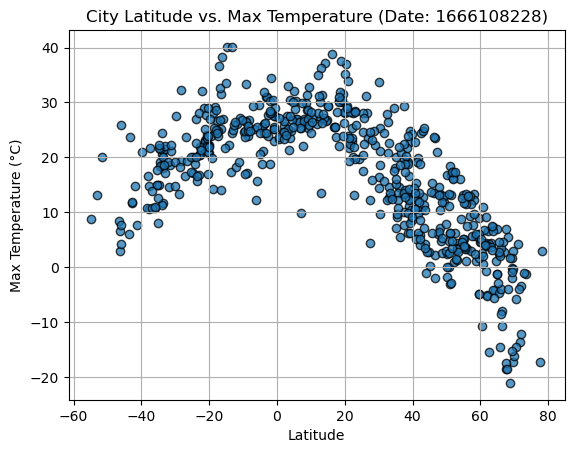

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (Date: {})".format(city_data_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

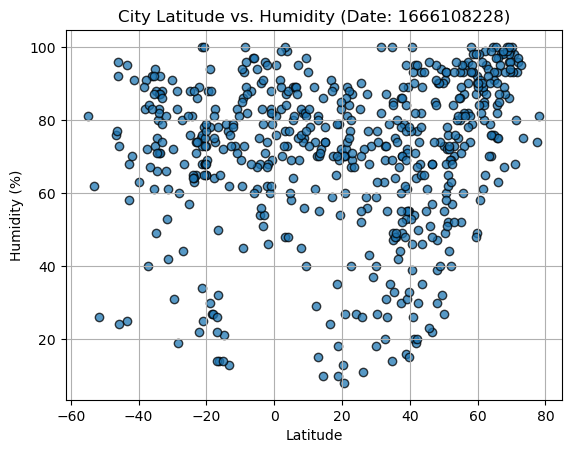

In [15]:
# Scatter plot: Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (Date: {})".format(city_data_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

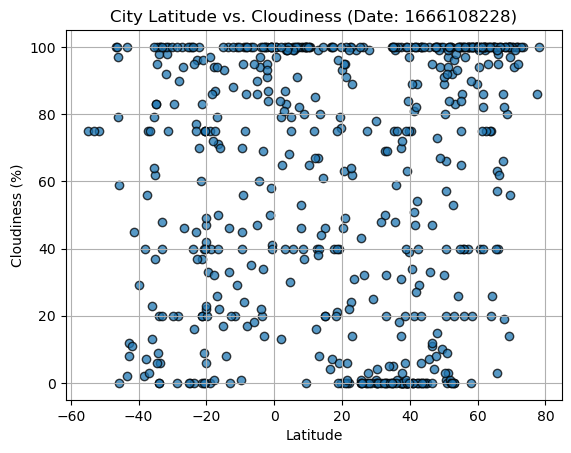

In [17]:
# Scatter plot: Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (Date: {})".format(city_data_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

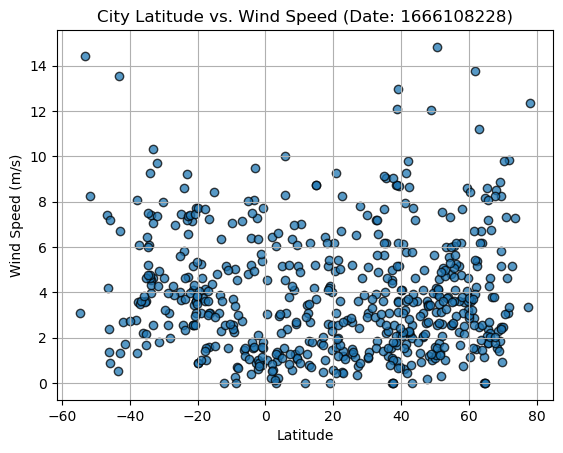

In [19]:
# Scatter plot: Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (Date: {})".format(city_data_df["Date"][0]))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434125


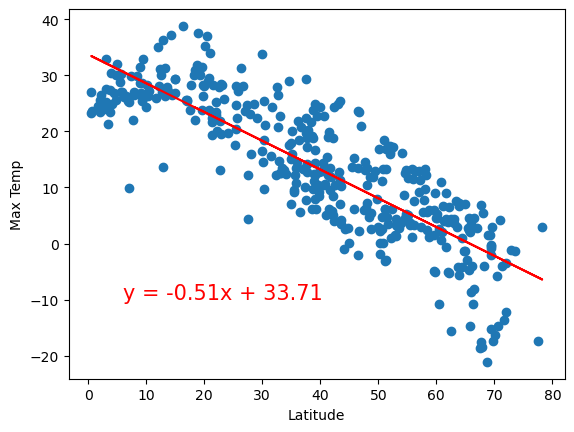

In [24]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.4121057168607252


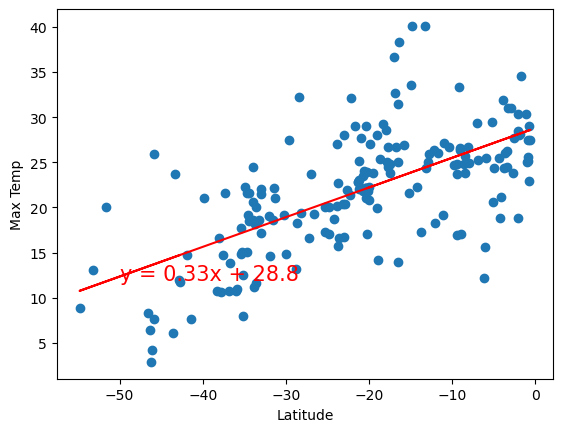

In [25]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-50,12))

**Discussion about the linear relationship: the linear regression analysis and correlation coefficients suggest a moderate relationship between latitude and maximum temperature, with the specific nature of the relationship (positive or negative) depending on whether we are examining the Northern or Southern Hemisphere. Keep in mind that correlation does not imply causation, and other factors may influence the observed patterns ** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


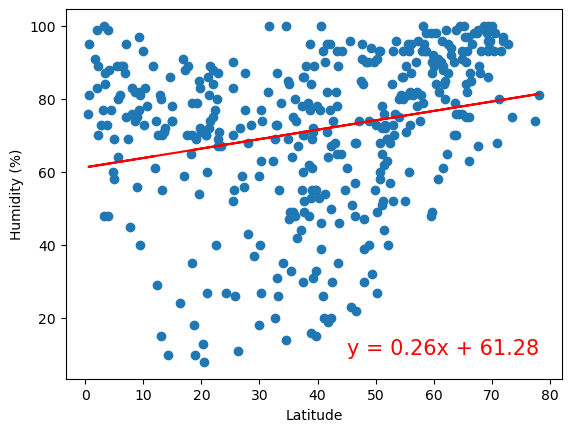

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity (%)", (45,10))

The r-value is: 0.0002808747046324618


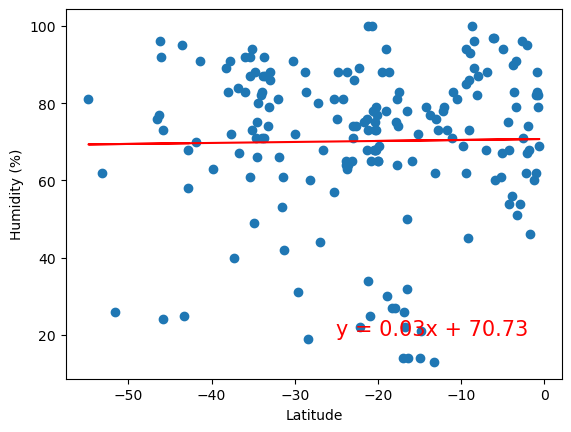

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity (%)", (-25,20))

**Discussion about the linear relationship: The linear regression analysis for humidity versus latitude in the Southern Hemisphere shows a weak positive correlation. The r-value is approximately 0.24, indicating a mild positive linear relationship between latitude and humidity. However, the scatter plot indicates a considerable amount of variability in humidity levels for different latitudes, suggesting that latitude alone may not be a strong predictor of humidity in the Southern Hemisphere. ** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811043


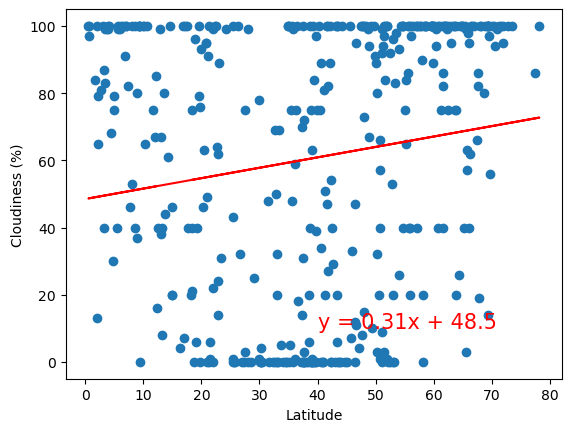

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness (%)",(40,10))

The r-value is: 0.020567354299943663


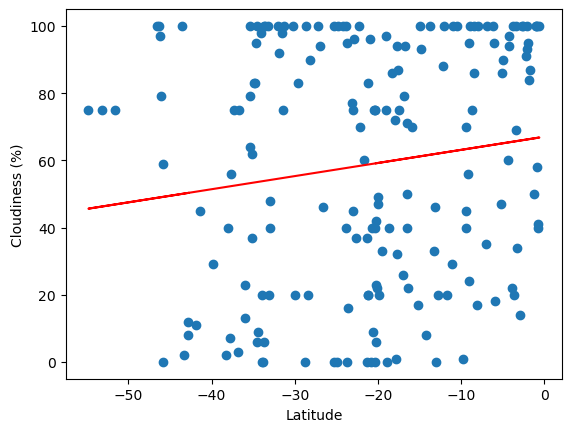

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness (%)",(40,10))

**Discussion about the linear relationship:  The r-value is approximately 0.25, indicating that there is a positive relationship between latitude and cloudiness. However, the relationship is not very strong, and cloudiness is influenced by various other factors beyond latitude. ** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449484


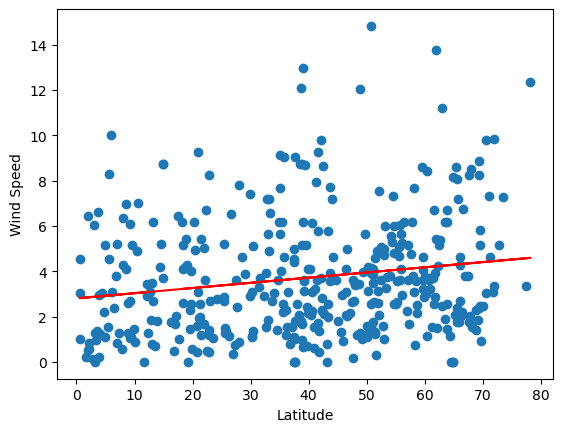

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(40,25))

The r-value is: 0.06223904070051575


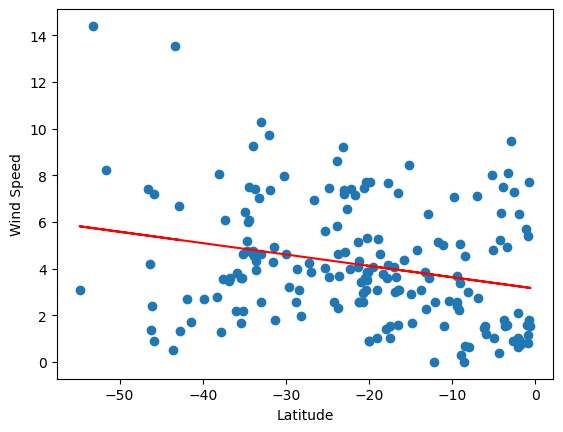

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-50,20))

**Discussion about the linear relationship: Wind Speed vs. Latitude in the Southern Hemisphere show a weak negative correlation. The data points are spread across the plot, and the regression line has a slight downward slope. This suggests that there is a tendency for lower wind speeds as we move away from the equator towards the South Pole in the Southern Hemisphere** YOUR RESPONSE HERE